In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
df = pd.read_csv("whatif_aerosols - Sheet1.csv")

In [3]:
df.head()

,index,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,OutagesCount,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,if_Aerosols
0,0,1992,1,2.212132,1.076356,2.991963,-1.760718,0.763482,0.0,1.534375,-1.487520,-1.128492,-1.277594,0.831324,-2.946962,1.205094,4.518989,-0.400627,6.518989
1,1,1992,2,2.517832,1.904234,2.741266,-1.480846,0.213346,0.0,1.660791,-1.406646,-1.413140,-1.370631,0.857259,-2.757169,0.956994,4.556087,-0.500930,6.556087
2,2,1992,3,1.388318,0.821059,1.735396,-1.396224,0.490418,0.0,1.787207,-1.311938,-1.291588,-1.486399,0.880763,-2.688122,1.785988,4.333498,-0.820644,6.333498
3,3,1992,4,1.156233,0.054116,2.061096,0.052823,0.965017,0.0,2.078695,-1.186371,-1.247993,-1.534503,0.870342,-2.655429,1.393443,4.191851,-1.240662,6.191851
4,4,1992,5,0.400976,-0.133942,0.864121,-0.109821,0.584660,0.0,1.931384,-1.127843,-1.697274,-1.567542,0.900793,-2.532068,0.931534,4.168243,-1.284544,6.168243


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          265 non-null    int64  
 1   Year                           265 non-null    int64  
 2   Month                          265 non-null    int64  
 3   Total Daily Sunspots           265 non-null    float64
 4   Northern Total Daily Sunspots  265 non-null    float64
 5   Southern Total Daily Sunspots  265 non-null    float64
 6   Earthquake                     264 non-null    float64
 7   Magnitude                      264 non-null    float64
 8   OutagesCount                   265 non-null    float64
 9   MEI                            204 non-null    float64
 10  CO2                            204 non-null    float64
 11  CH4                            204 non-null    float64
 12  N2O                            204 non-null    flo

In [5]:
df.columns

Index(['index', 'Year', 'Month', 'Total Daily Sunspots',
       'Northern Total Daily Sunspots', 'Southern Total Daily Sunspots',
       'Earthquake', 'Magnitude', 'OutagesCount', 'MEI', 'CO2', 'CH4', 'N2O',
       'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp', 'if_Aerosols'],
      dtype='object')

In [6]:
df.describe()

,index,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,OutagesCount,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,if_Aerosols
count,265.000000,265.000000,265.000000,2.650000e+02,2.650000e+02,2.650000e+02,264.000000,264.000000,2.650000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,204.000000
mean,132.000000,2002.543396,6.479245,-9.860376e-12,1.558869e-11,-6.675455e-12,-0.330356,0.214755,-1.815095e-11,-1.260294e-11,8.137177e-12,-4.313761e-12,4.509857e-12,1.477448e-11,-4.225500e-12,1.504888e-12,-9.705909e-12,9.133818e-12,2.000000
std,76.643112,6.383499,3.468547,1.001892e+00,1.001892e+00,1.001892e+00,0.865230,0.972481,7.612788e-01,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460
min,0.000000,1992.000000,1.000000,-1.241596e+00,-1.104703e+00,-1.189744e+00,-1.760718,-2.351292,-1.029701e+00,-2.002141e+00,-1.832298e+00,-2.663023e+00,-1.567542e+00,-1.943928e+00,-2.946962e+00,-1.527391e+00,-4.285456e-01,-2.676244e+00,1.571454
25%,66.000000,1997.000000,3.000000,-8.774543e-01,-8.410007e-01,-8.496594e-01,-1.022900,-0.422739,-3.607232e-01,-7.575694e-01,-8.700577e-01,-6.669022e-01,-9.820298e-01,-8.957697e-01,-4.111306e-01,-8.734311e-01,-4.057809e-01,-7.344468e-01,1.594219
50%,132.000000,2003.000000,6.000000,-1.626573e-01,-2.516104e-01,-2.383288e-01,-0.273630,0.371668,0.000000e+00,-3.590085e-02,-5.307094e-02,1.267764e-01,1.061994e-01,1.824918e-01,4.584118e-01,-3.467692e-01,-3.610945e-01,1.886514e-01,1.638905
75%,198.000000,2008.000000,9.000000,6.695868e-01,6.708222e-01,6.463025e-01,0.174418,0.863325,0.000000e+00,5.624860e-01,8.575594e-01,8.213413e-01,8.037127e-01,9.291587e-01,7.544127e-01,7.378595e-01,-2.557023e-01,7.465852e-01,1.744298
max,264.000000,2014.000000,12.000000,3.014593e+00,3.237454e+00,3.051555e+00,4.134842,2.141963,4.545112e+00,2.841371e+00,1.952816e+00,1.877485e+00,1.815358e+00,1.230072e+00,9.191629e-01,3.266798e+00,4.556087e+00,2.564571e+00,6.556087


In [7]:
df.isna().sum()

index                             0
Year                              0
Month                             0
Total Daily Sunspots              0
Northern Total Daily Sunspots     0
Southern Total Daily Sunspots     0
Earthquake                        1
Magnitude                         1
OutagesCount                      0
MEI                              61
CO2                              61
CH4                              61
N2O                              61
CFC-11                           61
CFC-12                           61
TSI                              61
Aerosols                         61
Temp                             61
if_Aerosols                      61
dtype: int64

In [8]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          204 non-null    int64  
 1   Year                           204 non-null    int64  
 2   Month                          204 non-null    int64  
 3   Total Daily Sunspots           204 non-null    float64
 4   Northern Total Daily Sunspots  204 non-null    float64
 5   Southern Total Daily Sunspots  204 non-null    float64
 6   Earthquake                     204 non-null    float64
 7   Magnitude                      204 non-null    float64
 8   OutagesCount                   204 non-null    float64
 9   MEI                            204 non-null    float64
 10  CO2                            204 non-null    float64
 11  CH4                            204 non-null    float64
 12  N2O                            204 non-null    float64


In [9]:
df2.isna().sum()

index                            0
Year                             0
Month                            0
Total Daily Sunspots             0
Northern Total Daily Sunspots    0
Southern Total Daily Sunspots    0
Earthquake                       0
Magnitude                        0
OutagesCount                     0
MEI                              0
CO2                              0
CH4                              0
N2O                              0
CFC-11                           0
CFC-12                           0
TSI                              0
Aerosols                         0
Temp                             0
if_Aerosols                      0
dtype: int64

In [10]:
%matplotlib inline
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# What if Aerosols MLR 

In [11]:
predictors = ['if_Aerosols', 'CO2', 'N2O', 'Year', 'Month']

outcome = 'Earthquake'

X = df2[predictors]
y = df2[outcome]

print(X.shape)
X.head(1)

(204, 5)


,if_Aerosols,CO2,N2O,Year,Month
0,6.518989,-1.48752,-1.277594,1992,1


In [12]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [13]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [14]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -1526.1703143146558
     Predictor  coefficient
0  if_Aerosols     0.542790
1          CO2    -0.147517
2          N2O    -2.930460
3         Year     0.762067
4        Month     0.069541

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6255
            Mean Absolute Error (MAE) : 0.4438
          Mean Percentage Error (MPE) : 175.2441
Mean Absolute Percentage Error (MAPE) : 235.7380


In [15]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     14.14
Date:                Wed, 08 May 2024   Prob (F-statistic):           8.59e-11
Time:                        12:46:51   Log-Likelihood:                -115.86
No. Observations:                 122   AIC:                             243.7
Df Residuals:                     116   BIC:                             260.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1526.1703    408.399     -3.737      

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: -1526.1703143146558
     Predictor  Coefficient
0  if_Aerosols     0.542790
1          CO2    -0.147517
2          N2O    -2.930460
3         Year     0.762067
4        Month     0.069541
Mean Squared Error: 0.39120956713534666
R^2: 0.37866117128933663


In [17]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127  -0.349010 -0.886166 -0.537156
203   0.240620  0.591218  0.350598
18   -1.206904 -0.895482  0.311422
175   0.253671 -0.020542 -0.274213
196   0.270432  2.607384  2.336952
31   -0.764006 -1.213395 -0.449390
28   -0.935222 -1.093838 -0.158616
40   -0.914800 -1.292194 -0.377394
95   -0.888650 -1.091121 -0.202471
38   -1.238375 -1.353137 -0.114762
145  -0.329062  0.240310  0.569372
44   -0.578345 -0.110210  0.468136
51   -0.988647 -1.156722 -0.168075
69   -0.789409 -0.883837 -0.094427
4     0.322692 -0.109821 -0.432514
93   -0.812779 -0.018601  0.794178
172   0.017315  0.369959  0.352645
150   0.065041  0.054764 -0.010278
11   -0.904983 -0.967682 -0.062699
117  -0.616393 -1.145853 -0.529461


C:\Users\richw\AppData\Local\Temp\ipykernel_29904\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


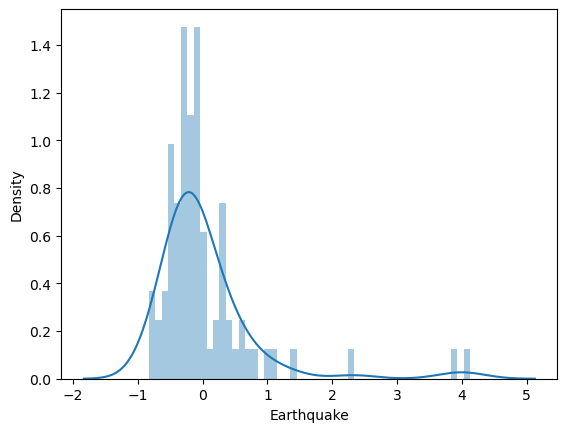

In [18]:
sns.distplot((valid_y-lm_pred),bins=50);

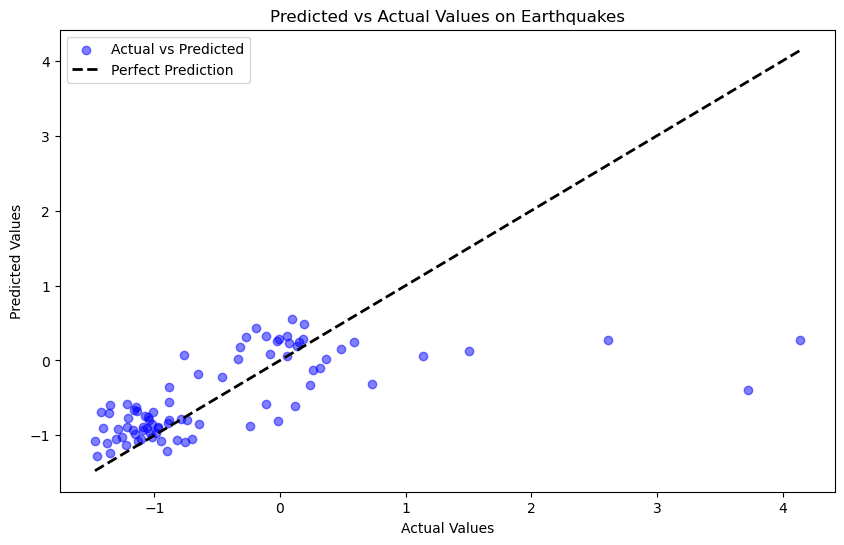

In [19]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Earthquakes')
plt.legend()
plt.show()

In [20]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: if_Aerosols, CO2, N2O, Year, Month
Start: score=245.72
Step: score=243.91, remove CO2
Step: score=243.91, remove None
['if_Aerosols', 'N2O', 'Year', 'Month']


# Predictors without CO2

In [21]:
predictors = ['if_Aerosols', 'N2O', 'Year', 'Month']

outcome = 'Earthquake'

X = df2[predictors]
y = df2[outcome]

print(X.shape)
X.head(1)

(204, 4)


,if_Aerosols,N2O,Year,Month
0,6.518989,-1.277594,1992,1


In [22]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [23]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [24]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -1436.8454595976496
     Predictor  coefficient
0  if_Aerosols     0.532074
1          N2O    -2.865113
2         Year     0.717407
3        Month     0.072166

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6260
            Mean Absolute Error (MAE) : 0.4416
          Mean Percentage Error (MPE) : 151.5596
Mean Absolute Percentage Error (MAPE) : 212.2267


In [25]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     17.75
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.06e-11
Time:                        12:46:51   Log-Likelihood:                -115.96
No. Observations:                 122   AIC:                             241.9
Df Residuals:                     117   BIC:                             255.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1436.8455    349.244     -4.114      

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: -1436.8454595976496
     Predictor  Coefficient
0  if_Aerosols     0.532074
1          N2O    -2.865113
2         Year     0.717407
3        Month     0.072166
Mean Squared Error: 0.3918217111391359
R^2: 0.3776889332096245


In [27]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127  -0.374880 -0.886166 -0.511286
203   0.263153  0.591218  0.328065
18   -1.188001 -0.895482  0.292519
175   0.236089 -0.020542 -0.256630
196   0.308116  2.607384  2.299268
31   -0.779741 -1.213395 -0.433654
28   -0.894139 -1.093838 -0.199700
40   -0.870252 -1.292194 -0.421942
95   -0.860949 -1.091121 -0.230172
38   -1.225618 -1.353137 -0.127519
145  -0.343053  0.240310  0.583363
44   -0.611532 -0.110210  0.501323
51   -0.963111 -1.156722 -0.193611
69   -0.829301 -0.883837 -0.054536
4     0.363862 -0.109821 -0.473684
93   -0.836409 -0.018601  0.817808
172   0.061947  0.369959  0.308012
150   0.059149  0.054764 -0.004386
11   -0.871642 -0.967682 -0.096040
117  -0.652616 -1.145853 -0.493237


C:\Users\richw\AppData\Local\Temp\ipykernel_29904\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


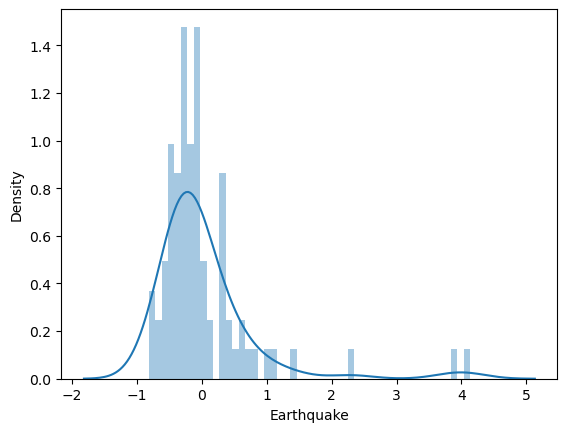

In [28]:
sns.distplot((valid_y-lm_pred),bins=50);

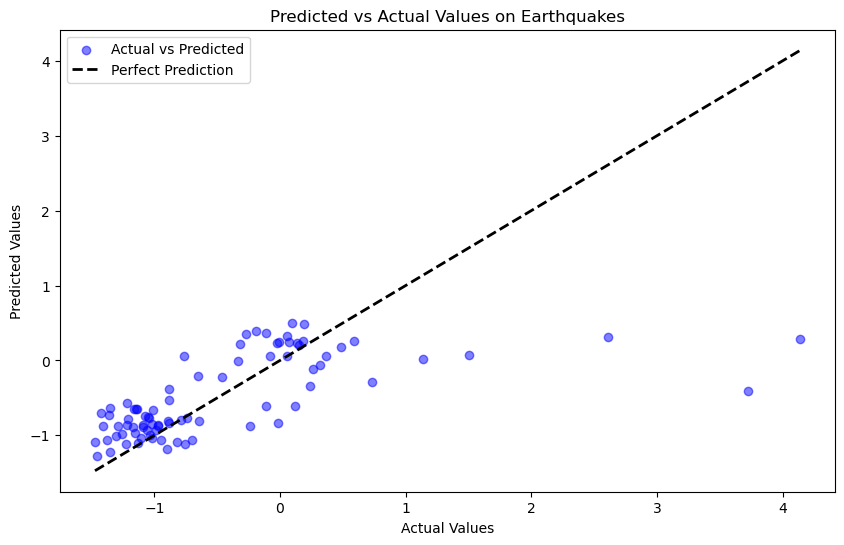

In [29]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Earthquakes')
plt.legend()
plt.show()

In [30]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: if_Aerosols, N2O, Year, Month
Start: score=243.91
Step: score=243.91, remove None
['if_Aerosols', 'N2O', 'Year', 'Month']


In [31]:
# Conclusions: if_Aerosols showed identical numbers with MLR of regular Aerosols levels 

# MLR with bins

In [32]:
num_bins = 5
bin_labels = ['Very Low','Low', 'Medium', 'High', 'Very High']

# Split the Aerosols column into bins
df2['Aerosols_bins'] = pd.cut(df2['Aerosols'], bins=num_bins, labels=bin_labels)

# Calculate summary statistics (e.g., mean earthquake values) for each bin
summary_stats = df2.groupby('Aerosols_bins')['Old_Earthquake'].mean()

# Print or visualize the summary statistics
print(summary_stats)

# Optionally, you can visualize the relationship between Aerosols bins and Earthquake
# For example, you can create a line plot
summary_stats.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Aerosols Bins')
plt.ylabel('Mean Earthquake')
plt.title('Mean Earthquake by Aerosols Bins')
plt.grid(True)
plt.show()

C:\Users\richw\AppData\Local\Temp\ipykernel_29904\1151603041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Aerosols_bins'] = pd.cut(df2['Aerosols'], bins=num_bins, labels=bin_labels)


KeyError: 'Column not found: Old_Earthquake'

In [ ]:
df2["column_bins"].value_counts() 

In [ ]:
Aerosols_bins = df2['column_bins']

In [ ]:
Aerosols_bins.value_counts()

In [ ]:
summary_stats = df2.groupby('Aerosols_bins')['Earthquake'].mean()
print(summary_stats)
summary_stats.plot(kind='bar', xlabel='Aerosols Bins', ylabel='Mean Old_Earthquake', title='Mean Old_Earthquake by Aerosols Bins')
plt.show()

# Import Earthquakes 1990-2023 Dataset 

In [ ]:
df_1990_2023 = pd.read_csv("Eartquakes-1990-2023.csv")

In [ ]:
df_1990_2023.head()

In [ ]:
df_1990_2023.info()

In [ ]:
df_1990_2023['date'] = pd.to_datetime(df_1990_2023['date'].str.slice(0, 19))

In [ ]:
df_1990_2023['date'].value_counts()

In [ ]:
# Filter the DataFrame to include only rows with dates between 1992 and 2008
years_df = df_1990_2023[(df_1990_2023['date'].dt.year >= 1992) & (df_1990_2023['date'].dt.year <= 2008)]

In [ ]:
years_df.head()

In [ ]:
years_df.tail()

In [ ]:
years_df['magnitudo'].value_counts().head(204)

In [ ]:
df2.info()

In [ ]:
years_df['magnitudo'].unique()

In [ ]:
# Extract unique earthquake magnitudes from years_df
unique_magnitudes = years_df['magnitudo'].unique()

# Calculate the number of times the unique magnitudes need to be repeated
num_repeats = np.ceil(204 / len(unique_magnitudes)).astype(int)

# Repeat the unique magnitudes to fill 204 rows
repeated_magnitudes = np.tile(unique_magnitudes, num_repeats)[:204]

# Create a new column in df2 with the magnitudes repeated across 204 rows
df2['earthquake_magnitude'] = repeated_magnitudes

# Check the number of rows in df2
print(len(df2))


In [ ]:
df2.head()

In [ ]:
summary_stats = df2.groupby('Aerosols_bins')['earthquake_magnitude'].mean()
print(summary_stats)
summary_stats.plot(kind='bar', xlabel='Aerosols Bins', ylabel='Mean Old_Earthquake', title='Mean Old_Earthquake by Aerosols Bins')
plt.show()

In [ ]:
df2['earthquake_magnitude'].value_counts() > 6

In [ ]:
unique_magnitudes = df2['earthquake_magnitude'].unique()

# Sort the unique magnitudes in ascending order
sorted_magnitudes = np.sort(unique_magnitudes)

# Display the sorted magnitudes
print(sorted_magnitudes)

In [ ]:
## 

In [ ]:
num_bins = 5
bin_labels = ['Very Low','Low', 'Medium', 'High', 'Very High']

# Split the Aerosols column into bins
df2['if_Aerosols_bins'] = pd.cut(df2['if_Aerosols'], bins=num_bins, labels=bin_labels)

# Calculate summary statistics (e.g., mean earthquake values) for each bin
summary_stats = df2.groupby('if_Aerosols_bins')['earthquake_magnitude'].mean()

# Print or visualize the summary statistics
print(summary_stats)

# Optionally, you can visualize the relationship between Aerosols bins and Earthquake
# For example, you can create a line plot
summary_stats.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Aerosols Bins')
plt.ylabel('Mean Earthquake')
plt.title('Mean Earthquake by Aerosols Bins')
plt.grid(True)
plt.show()

In [ ]:
summary_stats = df2.groupby('Aerosols_bins')['earthquake_magnitude'].mean()
print(summary_stats)
summary_stats.plot(kind='bar', xlabel='Aerosols Bins', ylabel='Mean Earthquake Magnitude', title='Mean Earthquake Magnitude by Aerosols Bins')
plt.show()

In [ ]:
df2['earthquake_magnitude'].value_counts()

In [ ]:
sns.lmplot(x = "earthquake_magnitude", y = "if_Aerosols", data = df2)

# MLR with new earthquake_magnitude

In [ ]:
predictors = ['if_Aerosols', 'N2O', 'Year', 'Month']

outcome = 'earthquake_magnitude'

X = df2[predictors]
y = df2[outcome]

print(X.shape)
X.head(1)

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
lm = LinearRegression()
lm.fit(train_X, train_y)

In [ ]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

In [ ]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

In [ ]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

In [ ]:
sns.distplot((valid_y-lm_pred),bins=50);

In [ ]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Earthquakes')
plt.legend()
plt.show()

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

# Turning Erthquake magnitudes into bins and comparing against aerosols 

In [ ]:
num_bins = 5
bin_labels2 = ['Very Low','Low', 'Medium', 'High', 'Very High']

# Split the Aerosols column into bins
df2['magnitude_bins'] = pd.cut(df2['earthquake_magnitude'], bins=num_bins, labels=bin_labels)

# Calculate summary statistics (e.g., mean earthquake values) for each bin
summary_stats = df2.groupby('magnitude_bins')['Aerosols'].mean()

# Print or visualize the summary statistics
print(summary_stats)

# Optionally, you can visualize the relationship between Aerosols bins and Earthquake
# For example, you can create a line plot
summary_stats.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Aerosols Bins')
plt.ylabel('Mean Earthquake')
plt.title('Mean Earthquake by Aerosols Bins')
plt.grid(True)
plt.show()

In [ ]:
df2.columns

In [ ]:
summary_stats = df2.groupby('magnitude_bins')['Aerosols'].mean()
print(summary_stats)
summary_stats.plot(kind='bar', xlabel='Aerosols Bins', ylabel='Mean Old_Earthquake', title='Mean Old_Earthquake by Aerosols Bins')
plt.show()

# Get Magnitudes over 6 

In [ ]:
df2['magnitude_bins'].value_counts()

In [ ]:
df2.columns

In [ ]:
df2.head()

In [ ]:
filtered_magnitudes = df_1990_2023[df_1990_2023['magnitudo'] > 6]['magnitudo']
first_204_values = filtered_magnitudes.head(204)

In [ ]:
df2['over_six'] = first_204_values.values

In [ ]:
df2['over_six'].value_counts()

In [ ]:
num_bins = 5
bin_labels3 = ['Very Low','Low', 'Medium', 'High', 'Very High']

# Split the Aerosols column into bins
df2['Aerosols_bins'] = pd.cut(df2['Aerosols'], bins=num_bins, labels=bin_labels)

# Calculate summary statistics (e.g., mean earthquake values) for each bin
summary_stats = df2.groupby('Aerosols_bins')['over_six'].mean()

# Print or visualize the summary statistics
print(summary_stats)

# Optionally, you can visualize the relationship between Aerosols bins and Earthquake
# For example, you can create a line plot
summary_stats.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Aerosols Bins')
plt.ylabel('Mean Earthquake')
plt.title('Mean Earthquake by Aerosols Bins')
plt.grid(True)
plt.show()

In [ ]:
summary_stats = df2.groupby('Aerosols_bins')['over_six'].mean()
print(summary_stats)
summary_stats.plot(kind='bar', xlabel='Aerosols Bins', ylabel='Mean Earthquake Magnitude', title='Mean Earthquake Magnitude by Aerosols Bins')
plt.show()

# HeatMap

In [ ]:
df_numeric = df2.drop(columns=['Aerosols_bins', 'column_bins', 'if_Aerosols_bins', 'magnitude_bins'])

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_numeric.corr(), annot=True, linewidth=1)
plt.show()

# sunspot MLR 

In [53]:
predictors = ['new_mult', 'Year', 'Month']

outcome = 'Earthquake'

X = df2[predictors]
y = df2[outcome]

print(X.shape)
X.head(1)

(204, 3)


,new_mult,Year,Month
0,90.379772,1992,1


In [54]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [55]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [56]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -212.19981280461568
  Predictor  coefficient
0  new_mult     0.015450
1      Year     0.105722
2     Month     0.024371

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6632
            Mean Absolute Error (MAE) : 0.4783
          Mean Percentage Error (MPE) : 65.6261
Mean Absolute Percentage Error (MAPE) : 114.7040


In [57]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

#Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     16.98
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.12e-09
Time:                        12:47:45   Log-Likelihood:                -123.00
No. Observations:                 122   AIC:                             254.0
Df Residuals:                     118   BIC:                             265.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -212.1998     30.369     -6.987      0.0

In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_X and train_y are your training features and target variable
lm = LinearRegression()
lm.fit(train_X, train_y)

# Print intercept and coefficients
print('Intercept:', lm.intercept_)
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lm.coef_})
print(coefficients_df)

# Print performance measures
predictions = lm.predict(train_X)
mse = mean_squared_error(train_y, predictions)
r2 = r2_score(train_y, predictions)
print('Mean Squared Error:', mse)
print('R^2:', r2)

Intercept: -212.19981280461568
  Predictor  Coefficient
0  new_mult     0.015450
1      Year     0.105722
2     Month     0.024371
Mean Squared Error: 0.43980252920970464
R^2: 0.3014833702453823


In [59]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
127  -0.354910 -0.886166 -0.531256
203   0.378213  0.591218  0.213005
18   -1.009775 -0.895482  0.114293
175   0.069022 -0.020542 -0.089564
196   0.206831  2.607384  2.400553
31   -1.192769 -1.213395 -0.020626
28   -1.264216 -1.093838  0.170378
40   -1.163965 -1.292194 -0.128229
95   -0.574591 -1.091121 -0.516530
38   -1.212239 -1.353137 -0.140898
145  -0.289537  0.240310  0.529847
44   -1.067261 -0.110210  0.957051
51   -1.084542 -1.156722 -0.072180
69   -0.833216 -0.883837 -0.050621
4    -0.190904 -0.109821  0.081082
93   -0.623334 -0.018601  0.604733
172  -0.004666  0.369959  0.374625
150  -0.167732  0.054764  0.222496
11   -0.630984 -0.967682 -0.336698
117  -0.411889 -1.145853 -0.733964


C:\Users\richw\AppData\Local\Temp\ipykernel_29904\1324754206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


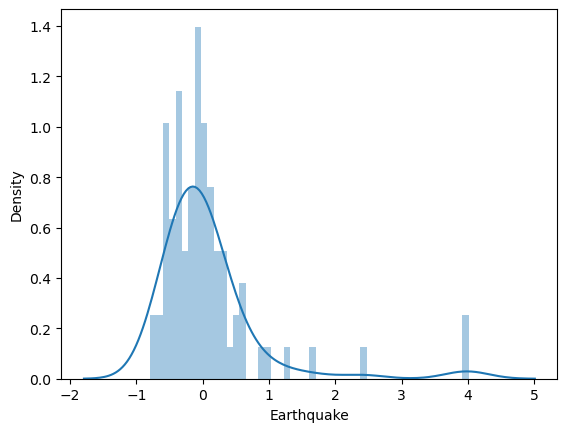

In [60]:
sns.distplot((valid_y-lm_pred),bins=50);

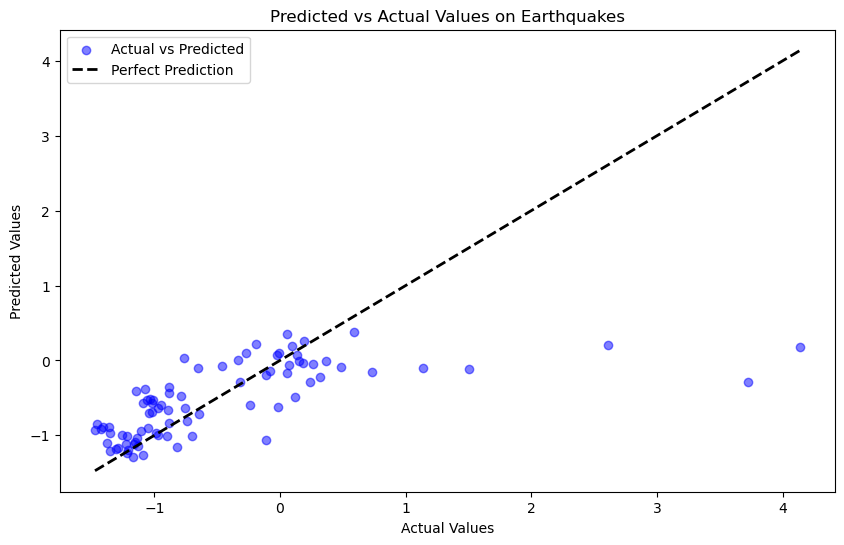

In [61]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values as a dot plot
plt.scatter(valid_y, lm_pred, color='blue', label='Actual vs Predicted', alpha=0.5)

# Plot a line showing the perfect prediction (y=x)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Earthquakes')
plt.legend()
plt.show()

In [62]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: new_mult, Year, Month
Start: score=256.01
Step: score=256.01, remove None
['new_mult', 'Year', 'Month']


In [63]:
df2['mult_Aerosols'] = df['Aerosols'] * 30

C:\Users\richw\AppData\Local\Temp\ipykernel_29904\738903089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mult_Aerosols'] = df['Aerosols'] * 30


In [64]:
df2.head()

,index,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,OutagesCount,MEI,...,CFC-11,CFC-12,TSI,Aerosols,Temp,if_Aerosols,Aerosols_bins,mult_Aerosols,new_mult,lower_Aerosols
0,0,1992,1,2.212132,1.076356,2.991963,-1.760718,0.763482,0.0,1.534375,...,0.831324,-2.946962,1.205094,4.518989,-0.400627,6.518989,Very High,135.569658,90.379772,-5.481011
1,1,1992,2,2.517832,1.904234,2.741266,-1.480846,0.213346,0.0,1.660791,...,0.857259,-2.757169,0.956994,4.556087,-0.500930,6.556087,Very High,136.682600,91.121734,-5.443913
2,2,1992,3,1.388318,0.821059,1.735396,-1.396224,0.490418,0.0,1.787207,...,0.880763,-2.688122,1.785988,4.333498,-0.820644,6.333498,Very High,130.004947,86.669964,-5.666502
3,3,1992,4,1.156233,0.054116,2.061096,0.052823,0.965017,0.0,2.078695,...,0.870342,-2.655429,1.393443,4.191851,-1.240662,6.191851,Very High,125.755531,83.837021,-5.808149
4,4,1992,5,0.400976,-0.133942,0.864121,-0.109821,0.584660,0.0,1.931384,...,0.900793,-2.532068,0.931534,4.168243,-1.284544,6.168243,Very High,125.047295,83.364863,-5.831757


In [65]:
multiplier = 20

# Create a new column 'C' and multiply only the first 5 rows of column 'A' by the multiplier
df2['new_mult'] = df['Aerosols'].copy()
df2.loc[:25, 'new_mult'] *= multiplier

C:\Users\richw\AppData\Local\Temp\ipykernel_29904\359915537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_mult'] = df['Aerosols'].copy()


In [66]:
df2.head()

,index,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,OutagesCount,MEI,...,CFC-11,CFC-12,TSI,Aerosols,Temp,if_Aerosols,Aerosols_bins,mult_Aerosols,new_mult,lower_Aerosols
0,0,1992,1,2.212132,1.076356,2.991963,-1.760718,0.763482,0.0,1.534375,...,0.831324,-2.946962,1.205094,4.518989,-0.400627,6.518989,Very High,135.569658,90.379772,-5.481011
1,1,1992,2,2.517832,1.904234,2.741266,-1.480846,0.213346,0.0,1.660791,...,0.857259,-2.757169,0.956994,4.556087,-0.500930,6.556087,Very High,136.682600,91.121734,-5.443913
2,2,1992,3,1.388318,0.821059,1.735396,-1.396224,0.490418,0.0,1.787207,...,0.880763,-2.688122,1.785988,4.333498,-0.820644,6.333498,Very High,130.004947,86.669964,-5.666502
3,3,1992,4,1.156233,0.054116,2.061096,0.052823,0.965017,0.0,2.078695,...,0.870342,-2.655429,1.393443,4.191851,-1.240662,6.191851,Very High,125.755531,83.837021,-5.808149
4,4,1992,5,0.400976,-0.133942,0.864121,-0.109821,0.584660,0.0,1.931384,...,0.900793,-2.532068,0.931534,4.168243,-1.284544,6.168243,Very High,125.047295,83.364863,-5.831757


In [37]:
df2['lower_Aerosols'] = df['Aerosols'] - 10

C:\Users\richw\AppData\Local\Temp\ipykernel_29904\1604271244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lower_Aerosols'] = df['Aerosols'] - 10


In [38]:
df2.head()

,index,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,OutagesCount,MEI,...,CFC-11,CFC-12,TSI,Aerosols,Temp,if_Aerosols,Aerosols_bins,mult_Aerosols,new_mult,lower_Aerosols
0,0,1992,1,2.212132,1.076356,2.991963,-1.760718,0.763482,0.0,1.534375,...,0.831324,-2.946962,1.205094,4.518989,-0.400627,6.518989,Very High,135.569658,90.379772,-5.481011
1,1,1992,2,2.517832,1.904234,2.741266,-1.480846,0.213346,0.0,1.660791,...,0.857259,-2.757169,0.956994,4.556087,-0.500930,6.556087,Very High,136.682600,91.121734,-5.443913
2,2,1992,3,1.388318,0.821059,1.735396,-1.396224,0.490418,0.0,1.787207,...,0.880763,-2.688122,1.785988,4.333498,-0.820644,6.333498,Very High,130.004947,86.669964,-5.666502
3,3,1992,4,1.156233,0.054116,2.061096,0.052823,0.965017,0.0,2.078695,...,0.870342,-2.655429,1.393443,4.191851,-1.240662,6.191851,Very High,125.755531,83.837021,-5.808149
4,4,1992,5,0.400976,-0.133942,0.864121,-0.109821,0.584660,0.0,1.931384,...,0.900793,-2.532068,0.931534,4.168243,-1.284544,6.168243,Very High,125.047295,83.364863,-5.831757
